# Descriptive Statistics 

Dataset: Hoa Phat Group Joint Stock Company

### Step 1. Import modules

In [106]:
import numpy as np
import pandas as pd
import math
import statistics as st
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

### Step 2. Read the dataset

In [107]:
df = pd.read_csv('HPG Historical Data.csv',delimiter=",", thousands=',')
df


,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,28600.0,28400.0,28800.0,28050.0,17.74M,1.24%
1,05/30/2024,28250.0,28500.0,28550.0,28000.0,27.26M,-1.22%
2,05/29/2024,28600.0,29100.0,29250.0,28600.0,21.60M,-1.89%
3,05/28/2024,29150.0,29000.0,29200.0,28800.0,17.56M,0.87%
4,05/27/2024,28900.0,28900.0,29300.0,28650.0,15.76M,0.00%
...,...,...,...,...,...,...,...
1308,03/07/2019,12001.1,12317.8,12335.4,12001.1,12.47M,-2.57%
1309,03/06/2019,12317.8,12317.8,12388.2,12106.6,9.24M,-0.14%
1310,03/05/2019,12335.4,12353.0,12529.0,12300.2,15.62M,-0.85%
1311,03/04/2019,12441.0,12229.8,12441.0,12212.2,13.74M,3.21%


### Step 3. Data Preprocessing

In [108]:
# Convert the data types
df['Date'] = pd.to_datetime(df['Date'])


In [109]:
# Data size
df.shape

(1313, 7)

In [110]:
# Determine the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1313 non-null   datetime64[ns]
 1   Price     1313 non-null   float64       
 2   Open      1313 non-null   float64       
 3   High      1313 non-null   float64       
 4   Low       1313 non-null   float64       
 5   Vol.      1313 non-null   object        
 6   Change %  1313 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 71.9+ KB


### Step 4. Descriptive Statistics

In [111]:
# Describe the dataset
df.describe()

,Date,Price,Open,High,Low
count,1313,1313.000000,1313.000000,1313.000000,1313.000000
mean,2021-10-12 16:33:37.974105088,21626.984692,21641.931531,21938.011424,21347.854379
min,2019-03-01 00:00:00,7411.800000,7000.000000,7640.600000,6977.200000
25%,2020-06-23 00:00:00,12353.000000,12353.000000,12536.000000,12170.000000
50%,2021-10-12 00:00:00,20847.000000,20773.000000,21136.000000,20544.500000
75%,2023-02-07 00:00:00,26773.000000,26727.000000,27091.000000,26317.000000
max,2024-05-31 00:00:00,43895.800000,43895.800000,44198.500000,43517.400000
std,NaN,9430.824724,9457.093548,9566.679793,9332.295555


In [112]:
# Describe the 'Price' attribute
df['Price'].describe()

count     1313.000000
mean     21626.984692
std       9430.824724
min       7411.800000
25%      12353.000000
50%      20847.000000
75%      26773.000000
max      43895.800000
Name: Price, dtype: float64

In [113]:
# Mode
mode = st.mode(df['Price'])
print("Mode: ", mode)

# Variance
var = st.variance(df['Price'])
print("Variance: ", var)

# Median
median = st.median(df['Price'])
print("Median: ", median)

# Coefficient of Deviation
cv = st.stdev(df['Price']) / st.mean(df['Price'])
print("Coefficient of Deviation: ", cv)

# Skewness
skew = skew(df['Price'])
print("Skewness: ", skew)

# Kurtosis
kurtosis = kurtosis(df['Price'])
print("Kurtosis: ", kurtosis)

# Range
range = max(df['Price']) - min(df['Price'])
print("Range: ", range)

Mode:  18909.0
Variance:  88940454.97779138
Median:  20847.0
Coefficient of Deviation:  0.43606748044930016
Skewness:  0.47290828136326724
Kurtosis:  -0.7805248477817788
Range:  36484.0


### Step 5. Visualization

In [122]:
# Get data
df1 = pd.DataFrame(df, columns=['Date', 'Price'])

# Set 'Date' column as index for comparison plotting
df1.index = df1.Date
df1.drop('Date', axis=1, inplace=True)
df1 = df1.asfreq('D')
df1['Price'] = df1['Price'].ffill()

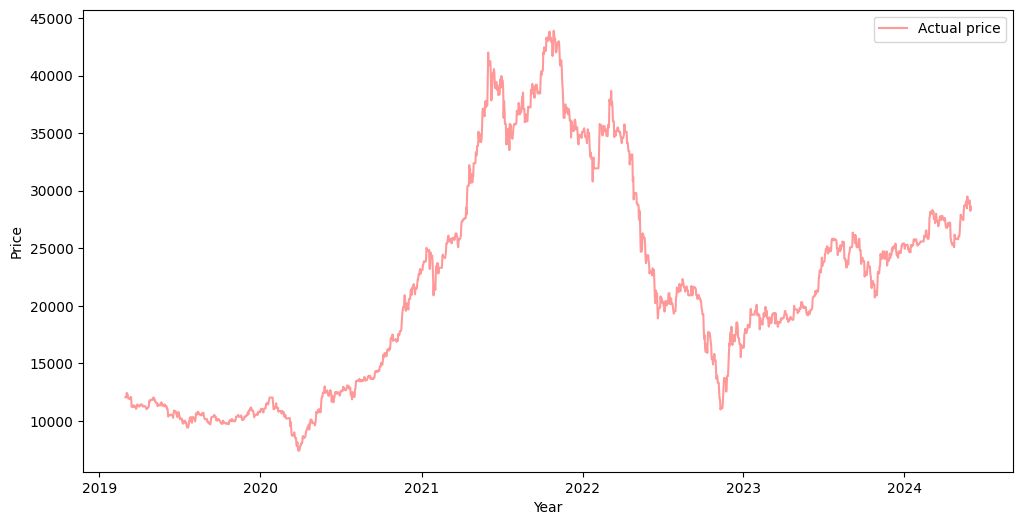

In [123]:
# Plot Price
plt.figure(figsize=(12, 6))
plt.plot(df1['Price'], label='Actual price', color='#FF9999')

# plt.title('HPG stock market')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Boxplot of HPG')

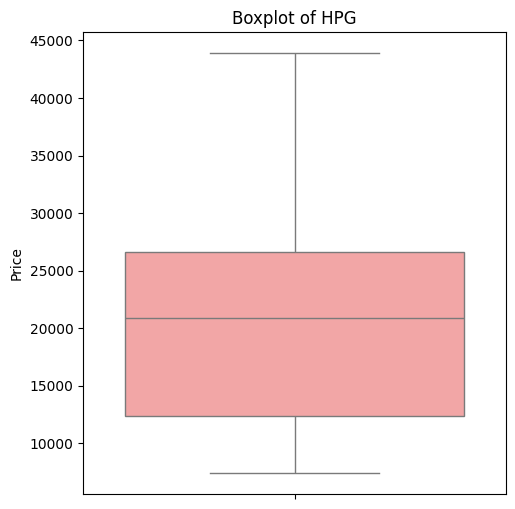

In [134]:
# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(df1['Price'], color='#FF9999', fliersize=5)
plt.title('Boxplot of HPG')

Text(0, 0.5, 'Frequency')

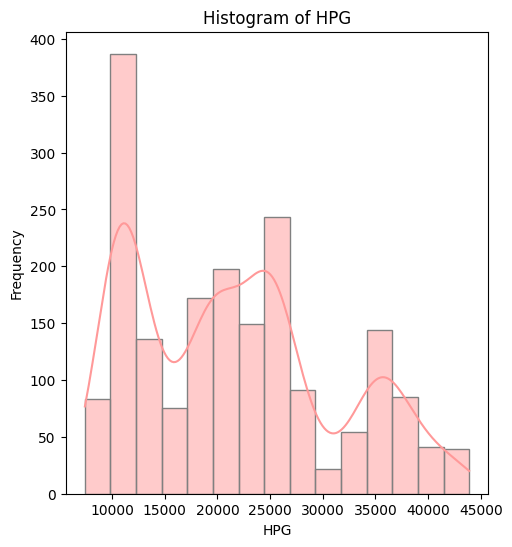

In [125]:
    # Histogram
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    sns.histplot(df1['Price'], bins=15, kde=True, color='#FF9999', edgecolor='grey')
    plt.title('Histogram of HPG')
    plt.xlabel('HPG')
    plt.ylabel('Frequency')

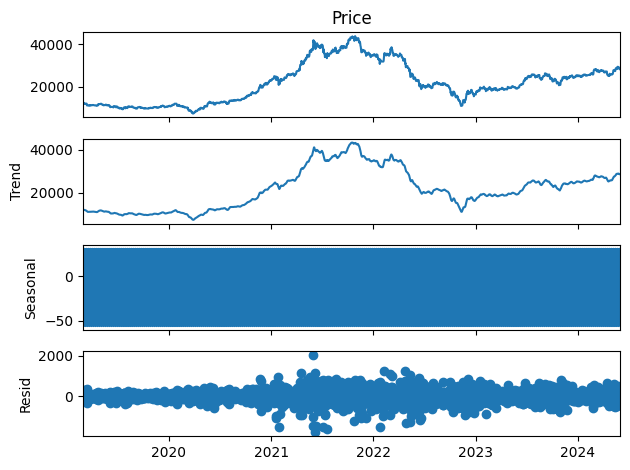

In [133]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df1['Price'], model='additive')
fig = decomposition.plot()
plt.plot(color='#FF9999')
plt.show()